In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#plt.rcParams.update({"font.family": "serif", "font.serif": "Computer Modern", "text.usetex": True})
import math as m

In [2]:
#plt.rcParams.keys()

In [3]:
xlist = np.arange(-18,18,.01)
xlist = list(filter(lambda x : x != 0, xlist)) #-> [x for ]
J1list = [sp.special.jv(1,x) for x in xlist]
ylist = [(J1list[i]/xlist[i]*2)**2 for i in range(len(xlist))]

J0list = [sp.special.jv(0,x) for x in xlist]
J2list = [sp.special.jv(2,x) for x in xlist]
J3list = [sp.special.jv(3,x) for x in xlist]

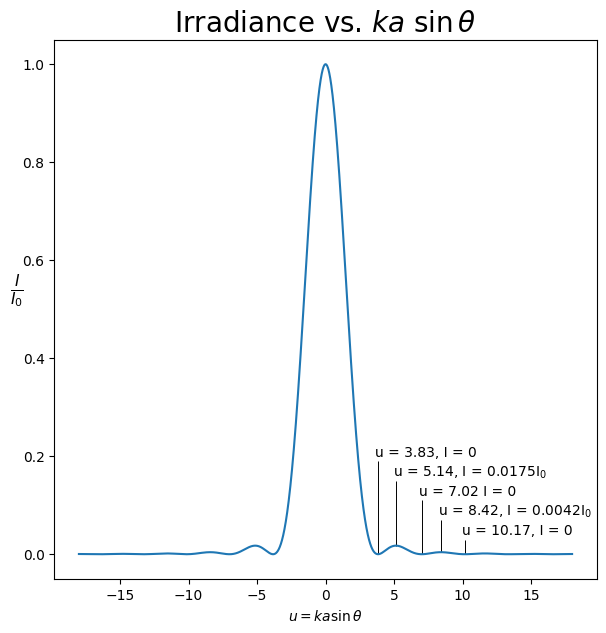

In [4]:
fig, ax = plt.subplots(figsize=[7,7])

plt.title(r'Irradiance vs. $ka$ $\sin \theta$', fontsize=20)

ax.vlines(3.83,0,0.19,color='black',linewidth = .7)
ax.annotate('u = 3.83, I = 0', xy=(3.6,.2))

ax.vlines(5.14,0.0175,0.15,color='black',linewidth = .7)
ax.annotate(r'u = 5.14, I = 0.0175I$_0$', xy=(4.91,.16))

ax.vlines(7.02,0,0.11,color='black',linewidth = .7)
ax.annotate('u = 7.02 I = 0', xy=(6.85,.12))

ax.vlines(8.42,0.0042,0.07,color='black',linewidth = .7)
ax.annotate(r'u = 8.42, I = 0.0042I$_0$', xy=(8.2,.08))

ax.vlines(10.17,0,0.03,color='black',linewidth = .7)
ax.annotate('u = 10.17, I = 0', xy=(9.95,.04))

ax.plot(xlist,ylist)
plt.ylabel(r'$\frac{I}{I_0}$',fontsize=16,rotation=0)
plt.xlabel(r'$u=ka \sin\theta$')
plt.show()
#plt.savefig("dopeFig.png")

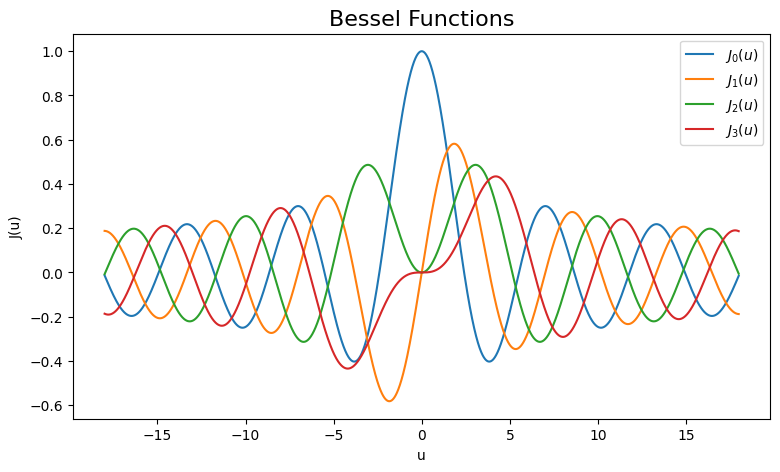

In [5]:
plt.figure(figsize=[9,5])
plt.plot(xlist,J0list, label=r'$J_0(u)$')
plt.plot(xlist,J1list, label=r'$J_1(u)$')
plt.plot(xlist,J2list, label=r'$J_2(u)$')
plt.plot(xlist,J3list, label=r'$J_3(u)$')
plt.legend()
plt.title("Bessel Functions",fontsize=16)
plt.xlabel("u")
plt.ylabel("J(u)")
plt.show()

In [6]:
width = 18 * 100
height = 18 * 100
scale = .01
J1grid = np.zeros([height,width])
Igrid = np.zeros([height,width])
for i in range(height):
    for j in range(width):
        R0 = ((i-height/2)**2+(j-width/2)**2)**(.5)
        R = R0*scale
        Jval = sp.special.jv(1,R)
        J1grid[i][j] = Jval
        Igrid[i][j] = (2*Jval/R)**2



C:\Users\krist\AppData\Local\Temp\ipykernel_5644\3124526559.py:12: RuntimeWarning: invalid value encountered in scalar divide
  Igrid[i][j] = (2*Jval/R)**2


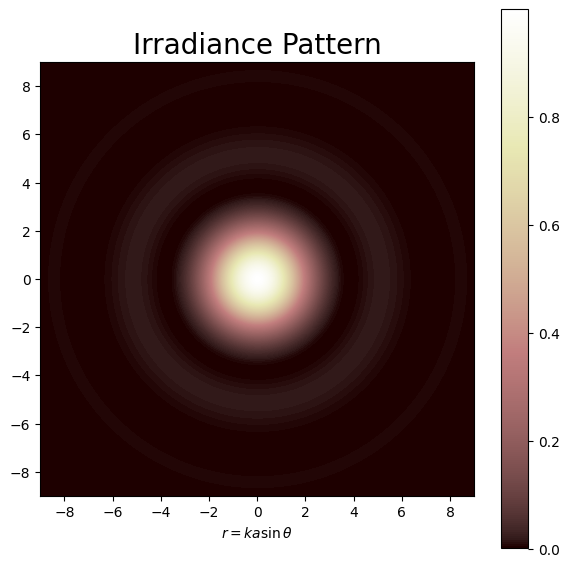

In [7]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
im = ax.imshow(Igrid,cmap='pink', extent=[-9,9,-9,9])
    
plt.plot()
plt.colorbar(im, ax=ax)
plt.title("Irradiance Pattern", fontsize=20)
plt.xlabel(r'$r=ka \sin\theta$')
plt.show() 

In [104]:
#airy disk on micado

k = 2*np.pi/(2.16e-6) #wavenumber 2pi/wavelength(m) Ks band
#k = 2*np.pi/(1.240e-6) #j band
#k = 2*np.pi/(1.03e-6) #Y band
a = 19.5 #telescope aperture (m)
ka = k*a

pix_scale = 4 * 4.84814e-9 # convert pixel scale to radians per pixel 4mas pixel scale
#pix_scale = 1.5 * 4.84814e-9 #1.5mas pixel scale
Jval = 0
u=0
R0 = 0
theta = 0
width = 200 #pixels across image
height = width 
airydisk = np.zeros([height,width])
for i in range(height):
    for j in range(width):
        R0 = ((i-height/2)**2+(j-width/2)**2)**(.5)
        theta = R0*pix_scale
        u = ka*np.sin(theta)
        Jval = sp.special.jv(1,u)
        if u == 0:
            airydisk[i][j] = 1
        else:
            airydisk[i][j] = (2*Jval/u)**2

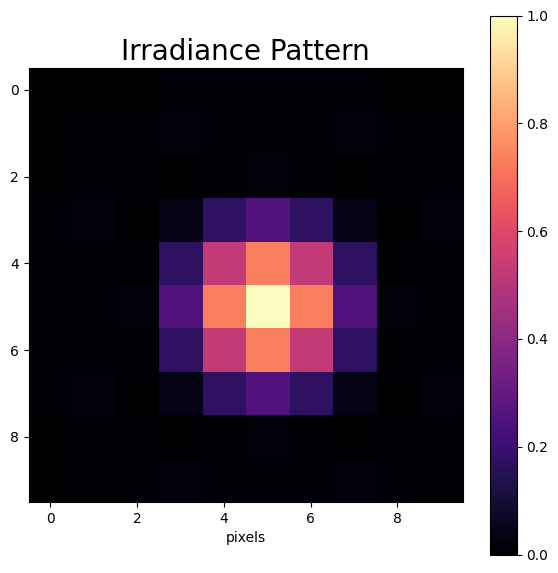

In [105]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
im = ax.imshow(airydisk[95:105,95:105],cmap='magma',vmin=0,vmax=1)
    
plt.plot()
plt.colorbar(im, ax=ax)
plt.title("Irradiance Pattern", fontsize=20)
plt.xlabel(r'pixels')
plt.show() 

In [92]:
tot = sum(sum(airydisk))
Imax = airydisk.max()
print(Imax)
print(tot)

1.0
3.412343888194015


In [98]:
wavelength = 1.03e-6/39
angle = (1.22*wavelength)*2.063e8 #airy disk in mas
print(angle/4) #pixels of airy disk 

1.6617729487179487


In [65]:
testarr = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
print(testarr[0:2,1:3])

[[2 3]
 [7 8]]


In [12]:
mags = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

Ks_MCAO_1p5 = [33, 29, 14, 12, 9, 8, 8, 8, 9, float("nan"), float("nan"), float("nan")]
Ks_MCAO_1p5 = [x*1.5 if m.isnan(x) == False else x for x in Ks_MCAO_1p5]

Ks_SCAO_1p5 = [60, 32, 28, 14, 11, 8, 8, 8, 8, 9, float("nan"), float("nan")]
Ks_SCAO_1p5 = [x*1.5 if m.isnan(x) == False else x for x in Ks_SCAO_1p5]

Ks_MCAO_4 = [69, 23, 13, 11, 5, 5, 3, 3, 3, 3, float("nan"), float("nan")]
Ks_MCAO_4 = [x*4 if m.isnan(x) == False else x for x in Ks_MCAO_4]

Ks_SCAO_4 = [71, 25, 23, 13, 11, 5, 5, 3, 3, 3, 3, float("nan")]
Ks_SCAO_4 = [x*4 if m.isnan(x) == False else x for x in Ks_SCAO_4]

J_MCAO_1p5 = [10, 10, 7, 4, 4, 4, 4, 5, 4, 6, float("nan"), float("nan")]
J_MCAO_1p5 = [x*1.5 if m.isnan(x) == False else x for x in J_MCAO_1p5]

J_SCAO_1p5 = [34, 20, 10, 10, 8, 5, 4, 4, 4, 4, 6, 7]
J_SCAO_1p5 = [x*1.5 if m.isnan(x) == False else x for x in J_SCAO_1p5]

J_MCAO_4 = [13, 7, 5, 3, 1, 1, 1, 1, 1, 1, float("nan"), float("nan")]
J_MCAO_4 = [x*4 if m.isnan(x) == False else x for x in J_MCAO_4]

J_SCAO_4 = [54, 27, 13, 7, 6, 3, 1, 1, 1, 1, 1, 1]
J_SCAO_4 = [x*4 if m.isnan(x) == False else x for x in J_SCAO_4]

Y_MCAO_1p5 = [10, 9, 7, 5, 4, 4, 4, 5, 5, 6, float("nan"), float("nan")]
Y_MCAO_1p5 = [x*1.5 if m.isnan(x) == False else x for x in Y_MCAO_1p5]

Y_SCAO_1p5 = [22, 20, 10, 10, 7, 5, 4, 4, 4, 5, 5, 7]
Y_SCAO_1p5 = [x*1.5 if m.isnan(x) == False else x for x in Y_SCAO_1p5]

Y_MCAO_4 = [13, 7, 3, 3, 1, 1, 1, 1, 1, 1, float("nan"), float("nan")]
Y_MCAO_4 = [x*4 if m.isnan(x) == False else x for x in Y_MCAO_4]

Y_SCAO_4 = [48, 23, 13, 7, 5, 3, 1, 1, 1, 1, 1, 2]
Y_SCAO_4 = [x*4 if m.isnan(x) == False else x for x in Y_SCAO_4]

[]

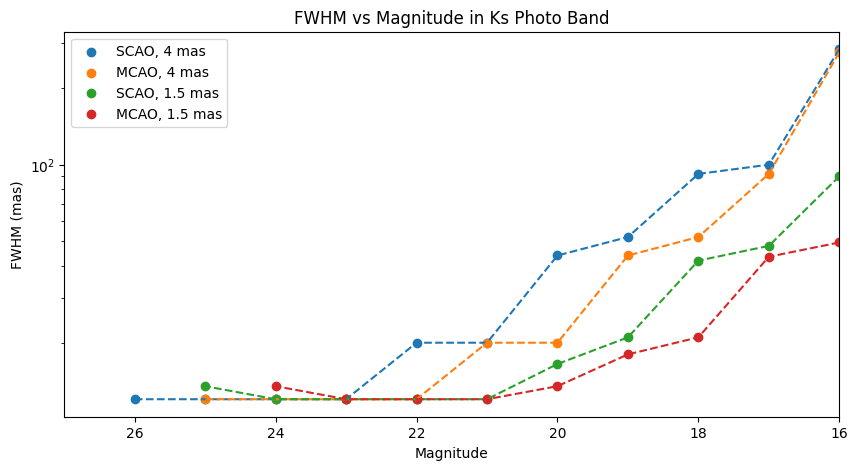

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(mags, Ks_SCAO_4, label = "SCAO, 4 mas")
plt.scatter(mags, Ks_MCAO_4, label = "MCAO, 4 mas")
plt.scatter(mags, Ks_SCAO_1p5, label = "SCAO, 1.5 mas")
plt.scatter(mags, Ks_MCAO_1p5, label = "MCAO, 1.5 mas")
plt.plot(mags, Ks_SCAO_4, linestyle='dashed')
plt.plot(mags, Ks_MCAO_4, linestyle='dashed')
plt.plot(mags, Ks_SCAO_1p5, linestyle='dashed')
plt.plot(mags, Ks_MCAO_1p5, linestyle='dashed')
plt.title("FWHM vs Magnitude in Ks Photo Band")
plt.xlim(max(mags),min(mags))
plt.xlabel("Magnitude")
plt.ylabel("FWHM (mas)")
plt.yscale("log")
plt.legend()
plt.plot()

[]

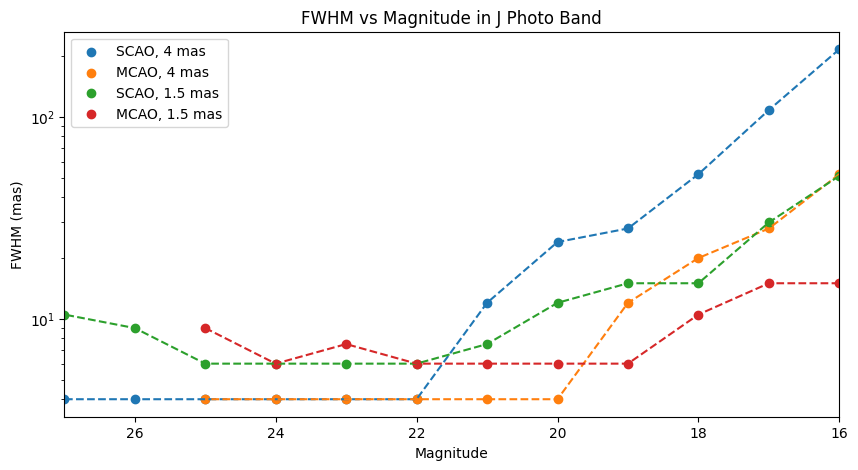

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(mags, J_SCAO_4, label = "SCAO, 4 mas")
plt.scatter(mags, J_MCAO_4, label = "MCAO, 4 mas")
plt.scatter(mags, J_SCAO_1p5, label = "SCAO, 1.5 mas")
plt.scatter(mags, J_MCAO_1p5, label = "MCAO, 1.5 mas")
plt.plot(mags, J_SCAO_4, linestyle='dashed')
plt.plot(mags, J_MCAO_4, linestyle='dashed')
plt.plot(mags, J_SCAO_1p5, linestyle='dashed')
plt.plot(mags, J_MCAO_1p5, linestyle='dashed')
plt.title("FWHM vs Magnitude in J Photo Band")
plt.xlim(max(mags),min(mags))
plt.xlabel("Magnitude")
plt.ylabel("FWHM (mas)")
plt.yscale("log")
plt.legend()
plt.plot()

[]

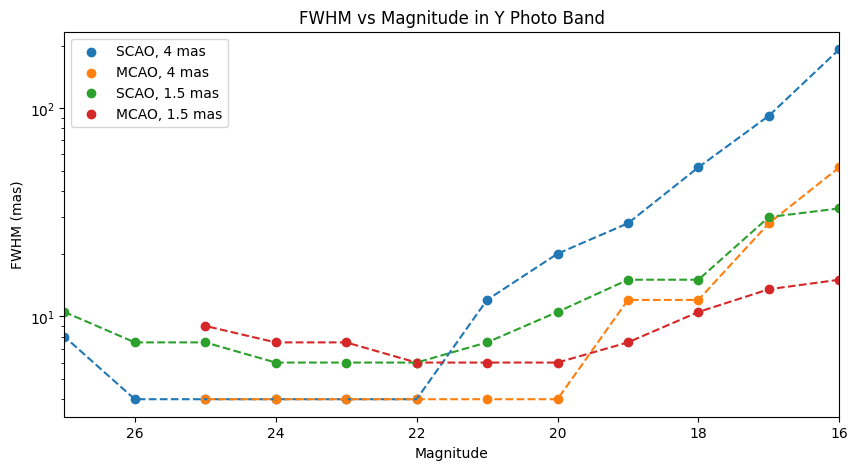

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(mags, Y_SCAO_4, label = "SCAO, 4 mas")
plt.scatter(mags, Y_MCAO_4, label = "MCAO, 4 mas")
plt.scatter(mags, Y_SCAO_1p5, label = "SCAO, 1.5 mas")
plt.scatter(mags, Y_MCAO_1p5, label = "MCAO, 1.5 mas")
plt.plot(mags, Y_SCAO_4, linestyle='dashed')
plt.plot(mags, Y_MCAO_4, linestyle='dashed')
plt.plot(mags, Y_SCAO_1p5, linestyle='dashed')
plt.plot(mags, Y_MCAO_1p5, linestyle='dashed')
plt.title("FWHM vs Magnitude in Y Photo Band")
plt.xlim(max(mags),min(mags))
plt.xlabel("Magnitude")
plt.ylabel("FWHM (mas)")
plt.yscale("log")
plt.legend()
plt.plot()

In [11]:
dlist = [14.3*1000000000, 21.6*1000000000, 34.1*1000000000, 52*1000000000, 35.9*1000000000, 50.3*1000000000, 74.2*1000000000, 107*1000000000, 9.1*1000000000, 25.6*1000000000]
mM = []
for d in dlist:
    mM.append(5*np.log10(d/10))

print(mM)

[45.77668018732531, 46.67226875575466, 47.663771894962494, 48.580016718173994, 47.775472242891595, 48.50783992527964, 49.35201952639513, 50.14691888842605, 44.79520696160547, 47.04119982655925]


1000000000.0